In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset into python environment

In [2]:
df = pd.read_csv("titanic_dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Make ‘PassengerId’ as the index column


In [4]:
df = pd.read_csv("titanic_dataset.csv", index_col ='PassengerId' )

In [6]:
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# #Check the basic details of the dataset

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Fill in all the missing values present in all the columns in the dataset

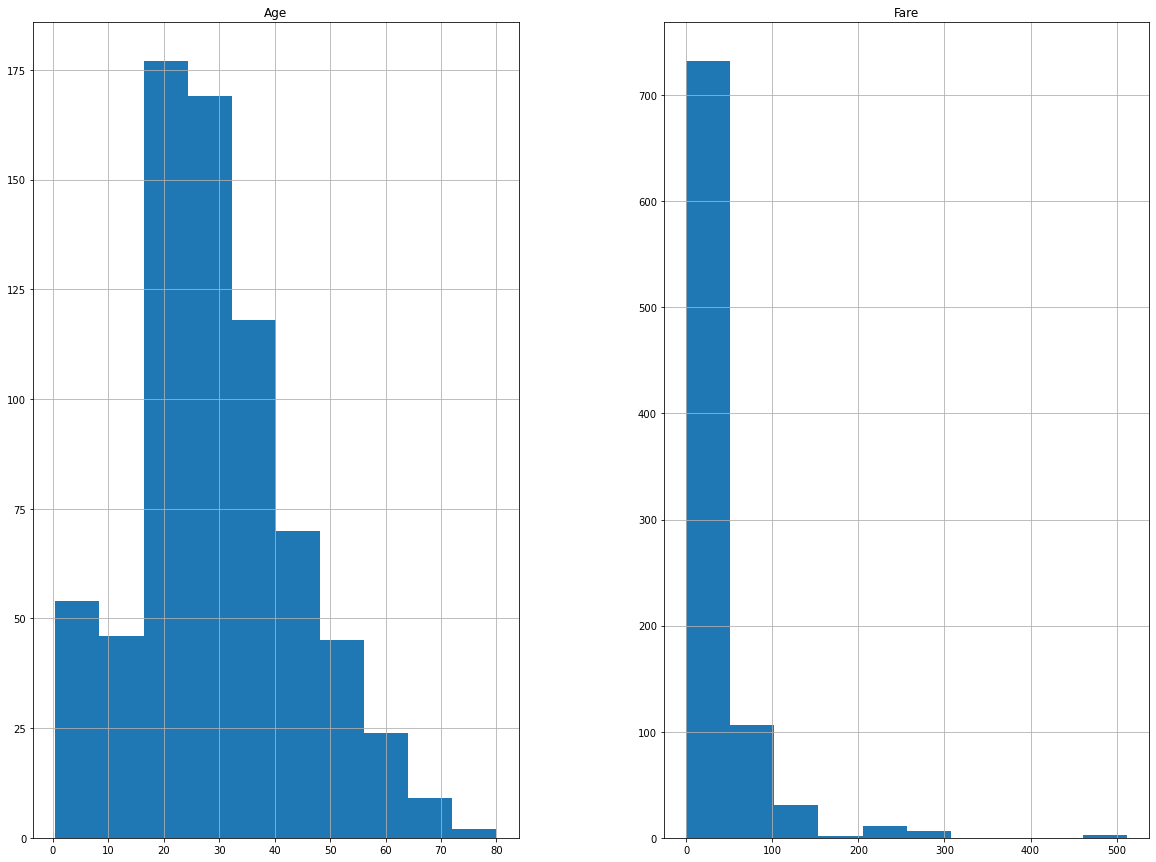

In [12]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [13]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
for i in ['Age',]:
    df[i] = df[i].fillna(df[i].median())

In [17]:
df.isna().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


droping column cabin since it contains high amt of null valve


In [19]:
df.drop('Cabin', axis=1,inplace=True)

In [20]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [23]:
df.loc[df.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [24]:
df = df.drop(df.index[[61, 829,]])

In [25]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

now data contains zero null values

# Check and handle outliers in at least 3 columns in the dataset

In [26]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


1.cheacking outliers for Fare

Text(0.5, 1.0, 'box plot of Fare')

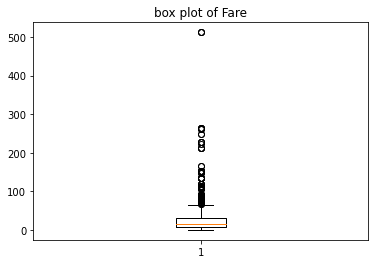

In [29]:
plt.boxplot(df['Fare'])
plt.title('box plot of Fare')

In [31]:
Q1 = np.percentile(df['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(df['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(df['Fare'],75,interpolation='midpoint')

In [34]:
print(Q1)
print(Q2)
print(Q3)

7.8958
14.4542
31.0


In [35]:
IQR = Q3-Q1

In [36]:
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

In [37]:
print(low_lim)
print(up_lim)

-26.7605
65.6563


In [39]:
outlier = []
for x in df ['Fare']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
    

In [42]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042

In [49]:
ind1 = df['Fare']>up_lim
ind_drop1=df.loc[ind1].index

In [50]:
df.drop (ind_drop1,inplace = True) 

In [51]:
df.shape

(775, 10)

Text(0.5, 1.0, 'box plot of Fare')

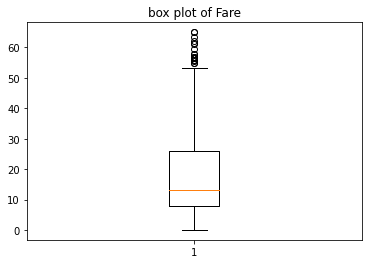

In [52]:
plt.boxplot(df['Fare'])
plt.title('box plot of Fare')

2.cheacking outliers for Pclass

Text(0.5, 1.0, 'box plot of Pclass')

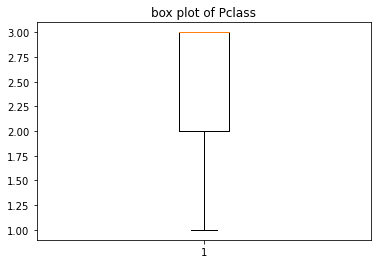

In [54]:
plt.boxplot(df['Pclass'])
plt.title('box plot of Pclass')

No outliers

3.cheacking outliers for Parch

Text(0.5, 1.0, 'box plot of Parch')

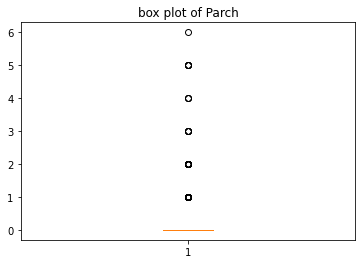

In [55]:
plt.boxplot(df['Parch'])
plt.title('box plot of Parch')

In [56]:
Q1 = np.percentile(df['Parch'],25,interpolation='midpoint')
Q2 = np.percentile(df['Parch'],50,interpolation='midpoint')
Q3 = np.percentile(df['Parch'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
0.0


In [61]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [62]:
outlier = []
for x in df ['Parch']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [63]:
outlier

[5, 5, 3, 4, 4, 3, 4, 5, 5, 6, 3, 3, 3, 5]

In [66]:
ind1 = df['Parch']>up_lim
df.loc[ind1].index

Int64Index([14, 26, 87, 168, 361, 438, 568, 611, 639, 679, 737, 775, 859, 886], dtype='int64', name='PassengerId')

In [68]:
df.drop([14, 26, 87, 168, 361, 438, 568, 611, 639, 679, 737, 775, 859, 886],inplace=True)

Text(0.5, 1.0, 'box plot of Parch')

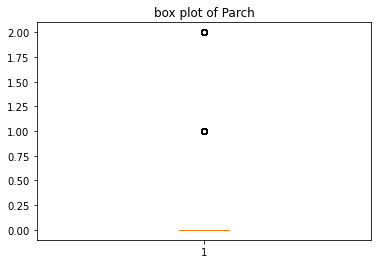

In [69]:
plt.boxplot(df['Parch'])
plt.title('box plot of Parch')

4.cheacking outliers for SibSp

Text(0.5, 1.0, 'box plot of SibSp')

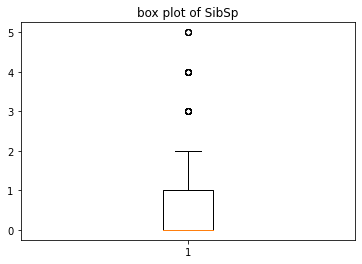

In [57]:
plt.boxplot(df['SibSp'])
plt.title('box plot of SibSp')

In [58]:
Q1 = np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(df['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [60]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print(low_lim)
print(up_lim)

-1.5
2.5


In [70]:
outlier = []
for x in df ['SibSp']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [71]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [72]:
ind1 = df['SibSp']>up_lim
df.loc[ind1].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [73]:
df.drop([ 8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],inplace=True)

Text(0.5, 1.0, 'box plot of SibSp')

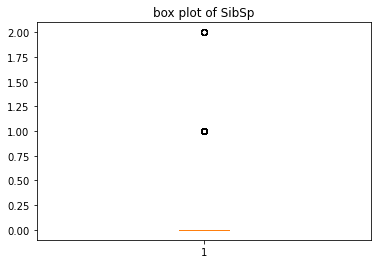

In [74]:
plt.boxplot(df['SibSp'])
plt.title('box plot of SibSp')

In [ ]:
df1=

outlier checked for 4 columns

#  Do min max scaling on the feature set (Take ‘Survived’ as target)

In [85]:
y = df['Survived']
x = df.drop('Survived',axis = 1)


In [86]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,725.000000,725.000000,725.000000,725.000000,725.000000
mean,2.448276,29.476207,0.264828,0.212414,16.930200
std,0.746364,12.274638,0.500211,0.516694,13.398005
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.879200
50%,3.000000,28.000000,0.000000,0.000000,10.516700
75%,3.000000,34.000000,0.000000,0.000000,24.150000
max,3.000000,80.000000,2.000000,2.000000,65.000000


In [87]:
type(x)

pandas.core.frame.DataFrame

In [88]:
from sklearn import preprocessing

In [82]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [ ]:
x = min_max.fit_transform(x)

In [ ]:
x = pd.dataframe(x)

In [ ]:
x.describe()

In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,random_state=42,text_size=0.2)
lr = linear_model.linearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('MSE is', mean_squared_error(y_test,predictions))
print('R sqaured value is',r2_score(y_test,predictions))